In [39]:
import numpy as np
import pandas as pd 
import re 
import gensim 
import json
import timeit
import networkx as nx
import matplotlib.pyplot as plt
import os
import sys
import pyLDAvis
import pyLDAvis.gensim

from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel

In [40]:
df = pd.read_csv("bestPatentsPeTopic.csv")

In [41]:
df.head()

,code,Unnamed: 0,title,pub_date,citations,abstract,class,year,abstract_processed,topic,class_topic,core,louvain,topiclouvain,GTcore
0,JP6239807B1,41,Method and system for behavior analysis of mob...,2017-11-29,"['KR101720930B1', 'CN106575327B', 'US9747430B2...",\n\n The computing device processor identifies...,G06,2017,\n\n the computing device processor identifies...,0,G06_0,2,5.0,5.0,5.0
1,US10104107B2,162,Methods and systems for behavior-specific actu...,2018-10-16,"['JP6140808B2', 'JP6188956B2', 'US9596257B2', ...",\nVarious embodiments include methods of evalu...,G06,2018,\nvarious embodiments include methods of evalu...,0,G06_0,2,5.0,5.0,5.0
2,US9910984B2,164,Methods and systems for on-device high-granula...,2018-03-06,"['US9779236B2', 'KR102160659B1', 'EP2836955B1'...",\nVarious aspects include methods and computin...,G06,2018,\nvarious aspects include methods and computin...,0,G06_0,2,5.0,5.0,5.0
3,US9330257B2,183,Adaptive observation of behavioral features on...,2016-05-03,"['US10015178B2', 'US10397262B2', 'TWI606360B',...","\nMethods, devices and systems for detecting s...",G06,2016,\nmethods devices and systems for detecting su...,0,G06_0,2,5.0,5.0,5.0
4,US9158604B1,184,Lightweight data-flow tracker for realtime beh...,2015-10-13,"['JP6235000B2', 'US20180300484A1', 'US20140201...",\nMethods and devices for detecting performanc...,G06,2015,\nmethods and devices for detecting performanc...,0,G06_0,2,5.0,5.0,5.0


In [61]:
df = df[df.topic != 2] #togliamo topic non rilevanti

In [62]:
df = df[df.topic != 6]

In [63]:
ab = []

for i in df.abstract:
    ab.append(i)
len(ab)

377

In [54]:
import re #removing punctuation
boh = []
for i in ab:
    res = re.sub(r'[^\w\s]', '', i)
    boh.append(res)
    
print(len(boh))

430


[]

In [55]:
abstracts = []
for i in boh:
    x = i.split()
    abstracts.append(x)
    
abstracts

[['The',
  'computing',
  'device',
  'processor',
  'identifies',
  'behavioral',
  'techniques',
  'and',
  'machine',
  'learning',
  'techniques',
  'to',
  'identify',
  'prevent',
  'correct',
  'or',
  'otherwise',
  'respond',
  'to',
  'malicious',
  'or',
  'performance',
  'degrading',
  'behavior',
  'of',
  'computing',
  'devices',
  'It',
  'may',
  'consist',
  'of',
  'processor',
  'executable',
  'instructions',
  'for',
  'implementing',
  'the',
  'method',
  'used',
  'As',
  'part',
  'of',
  'these',
  'actions',
  'the',
  'processor',
  'generates',
  'user',
  'persona',
  'information',
  'that',
  'characterizes',
  'the',
  'user',
  'based',
  'on',
  'the',
  'users',
  'activity',
  'preferences',
  'age',
  'occupation',
  'habit',
  'mood',
  'emotional',
  'state',
  'personality',
  'device',
  'usage',
  'pattern',
  'etc',
  'Can',
  'do',
  'The',
  'processor',
  'dynamically',
  'determines',
  'the',
  'number',
  'of',
  'device',
  'features

In [57]:
for i in abstracts:
    for j in i:
        if j.isupper():
            j.lower()


In [58]:
abstracts

[['The',
  'computing',
  'device',
  'processor',
  'identifies',
  'behavioral',
  'techniques',
  'and',
  'machine',
  'learning',
  'techniques',
  'to',
  'identify',
  'prevent',
  'correct',
  'or',
  'otherwise',
  'respond',
  'to',
  'malicious',
  'or',
  'performance',
  'degrading',
  'behavior',
  'of',
  'computing',
  'devices',
  'It',
  'may',
  'consist',
  'of',
  'processor',
  'executable',
  'instructions',
  'for',
  'implementing',
  'the',
  'method',
  'used',
  'As',
  'part',
  'of',
  'these',
  'actions',
  'the',
  'processor',
  'generates',
  'user',
  'persona',
  'information',
  'that',
  'characterizes',
  'the',
  'user',
  'based',
  'on',
  'the',
  'users',
  'activity',
  'preferences',
  'age',
  'occupation',
  'habit',
  'mood',
  'emotional',
  'state',
  'personality',
  'device',
  'usage',
  'pattern',
  'etc',
  'Can',
  'do',
  'The',
  'processor',
  'dynamically',
  'determines',
  'the',
  'number',
  'of',
  'device',
  'features

In [67]:
abstracts = []
for i in df.abstract:
    abstracts.append(i)

In [59]:
import nltk

C:\Users\bonin\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""


In [78]:
from nltk.tokenize import word_tokenize
tok = []
for i in abstracts:
    tok.append(word_tokenize(i))
tok[:2]

[['The',
  'computing',
  'device',
  'processor',
  'identifies',
  'behavioral',
  'techniques',
  'and',
  'machine',
  'learning',
  'techniques',
  'to',
  'identify',
  ',',
  'prevent',
  ',',
  'correct',
  ',',
  'or',
  'otherwise',
  'respond',
  'to',
  'malicious',
  'or',
  'performance',
  'degrading',
  'behavior',
  'of',
  'computing',
  'devices',
  '.',
  'It',
  'may',
  'consist',
  'of',
  'processor',
  'executable',
  'instructions',
  'for',
  'implementing',
  'the',
  'method',
  'used',
  '.',
  'As',
  'part',
  'of',
  'these',
  'actions',
  ',',
  'the',
  'processor',
  'generates',
  'user',
  'persona',
  'information',
  'that',
  'characterizes',
  'the',
  'user',
  'based',
  'on',
  'the',
  'user',
  "'s",
  'activity',
  ',',
  'preferences',
  ',',
  'age',
  ',',
  'occupation',
  ',',
  'habit',
  ',',
  'mood',
  ',',
  'emotional',
  'state',
  ',',
  'personality',
  ',',
  'device',
  'usage',
  'pattern',
  ',',
  'etc',
  '.',
  'Can'

In [77]:
a = []
for i in tok:
    a.append([w for w in i if w.isalpha()])
a[:2]

[['The', 'computing', 'device', 'processor', 'identifies', 'behavioral', 'techniques', 'and', 'machine', 'learning', 'techniques', 'to', 'identify', 'prevent', 'correct', 'or', 'otherwise', 'respond', 'to', 'malicious', 'or', 'performance', 'degrading', 'behavior', 'of', 'computing', 'devices', 'It', 'may', 'consist', 'of', 'processor', 'executable', 'instructions', 'for', 'implementing', 'the', 'method', 'used', 'As', 'part', 'of', 'these', 'actions', 'the', 'processor', 'generates', 'user', 'persona', 'information', 'that', 'characterizes', 'the', 'user', 'based', 'on', 'the', 'user', 'activity', 'preferences', 'age', 'occupation', 'habit', 'mood', 'emotional', 'state', 'personality', 'device', 'usage', 'pattern', 'etc', 'Can', 'do', 'The', 'processor', 'dynamically', 'determines', 'the', 'number', 'of', 'device', 'features', 'that', 'are', 'monitored', 'or', 'evaluated', 'within', 'the', 'computing', 'device', 'and', 'is', 'most', 'relevant', 'to', 'determining', 'if', 'the', 'devic

In [79]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
fin_tok = []
for i in a:
    fin_tok.append([w for w in i if not w in stop_words])
fin_tok[:2]

[['The',
  'computing',
  'device',
  'processor',
  'identifies',
  'behavioral',
  'techniques',
  'machine',
  'learning',
  'techniques',
  'identify',
  'prevent',
  'correct',
  'otherwise',
  'respond',
  'malicious',
  'performance',
  'degrading',
  'behavior',
  'computing',
  'devices',
  'It',
  'may',
  'consist',
  'processor',
  'executable',
  'instructions',
  'implementing',
  'method',
  'used',
  'As',
  'part',
  'actions',
  'processor',
  'generates',
  'user',
  'persona',
  'information',
  'characterizes',
  'user',
  'based',
  'user',
  'activity',
  'preferences',
  'age',
  'occupation',
  'habit',
  'mood',
  'emotional',
  'state',
  'personality',
  'device',
  'usage',
  'pattern',
  'etc',
  'Can',
  'The',
  'processor',
  'dynamically',
  'determines',
  'number',
  'device',
  'features',
  'monitored',
  'evaluated',
  'within',
  'computing',
  'device',
  'relevant',
  'determining',
  'device',
  'behavior',
  'match',
  'pattern',
  'normal',


In [82]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stem = []
for i in fin_tok:
    stem.append([porter.stem(w) for w in i])
stem[:2]

[['the',
  'comput',
  'devic',
  'processor',
  'identifi',
  'behavior',
  'techniqu',
  'machin',
  'learn',
  'techniqu',
  'identifi',
  'prevent',
  'correct',
  'otherwis',
  'respond',
  'malici',
  'perform',
  'degrad',
  'behavior',
  'comput',
  'devic',
  'It',
  'may',
  'consist',
  'processor',
  'execut',
  'instruct',
  'implement',
  'method',
  'use',
  'As',
  'part',
  'action',
  'processor',
  'gener',
  'user',
  'persona',
  'inform',
  'character',
  'user',
  'base',
  'user',
  'activ',
  'prefer',
  'age',
  'occup',
  'habit',
  'mood',
  'emot',
  'state',
  'person',
  'devic',
  'usag',
  'pattern',
  'etc',
  'can',
  'the',
  'processor',
  'dynam',
  'determin',
  'number',
  'devic',
  'featur',
  'monitor',
  'evalu',
  'within',
  'comput',
  'devic',
  'relev',
  'determin',
  'devic',
  'behavior',
  'match',
  'pattern',
  'normal',
  'usag',
  'comput',
  'devic',
  'user',
  'the',
  'persona',
  'inform',
  'user',
  'use',
  'identifi',
  

In [96]:
text = ""
for i in fin_tok:
    for j in i:
        text += j
        text += " "
text[:1500]


'The computing device processor identifies behavioral techniques machine learning techniques identify prevent correct otherwise respond malicious performance degrading behavior computing devices It may consist processor executable instructions implementing method used As part actions processor generates user persona information characterizes user based user activity preferences age occupation habit mood emotional state personality device usage pattern etc Can The processor dynamically determines number device features monitored evaluated within computing device relevant determining device behavior match pattern normal usage computing device user The persona information user used identify device behavior better identify respond better behavior computing device Various embodiments include methods evaluating device behaviors computing device enabling white listing particular behaviors Various embodiments may include monitoring activities software application operating computing device gen

In [97]:
from wordcloud import WordCloud

In [113]:
from PIL import Image

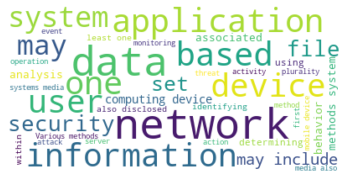

In [98]:
stopwords = set(stop_words)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=40, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [177]:
wine_mask = np.array(Image.open("buonissima.jpg"))
print(wine_mask)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [178]:
wine_mask.shape

(968, 995, 3)

In [179]:
wine_mask[100][120]

array([255, 255, 255], dtype=uint8)

In [190]:
def transform_format(val):
    if list(val) == [255,255,255]:
        return 255
    else:
        return val[0]
      
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

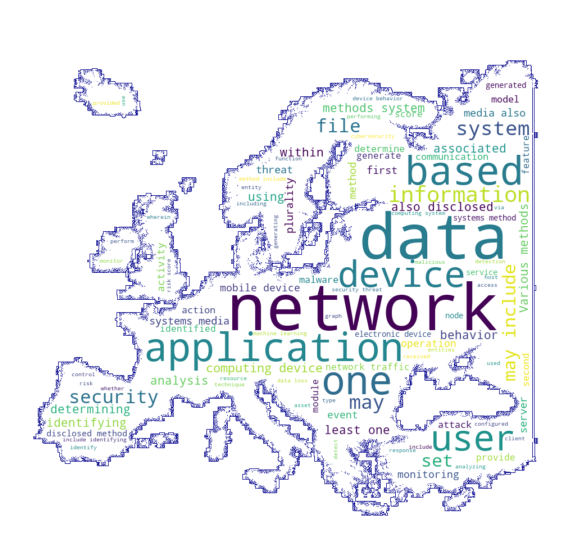

In [206]:
wc = WordCloud(background_color="white", max_words=100, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=0.1,max_font_size=200, contour_color="darkblue")

# Generate a wordcloud
wc.generate(text)


# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [122]:
np.where(europe == 255)

(array([  0,   0,   0, ..., 585, 585, 585], dtype=int64),
 array([  0,   0,   0, ..., 629, 629, 629], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

In [125]:
np.where(europe == 253)

(array([  2,   2,   2, ..., 584, 584, 584], dtype=int64),
 array([481, 481, 481, ..., 630, 630, 630], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

In [102]:
tot = []

for i in stem:
    for j in i:
        tot.append(j)
tot[:10]

['the',
 'comput',
 'devic',
 'processor',
 'identifi',
 'behavior',
 'techniqu',
 'machin',
 'learn',
 'techniqu']

In [104]:
from collections import Counter

In [107]:
a = list(Counter(tot).items())
a.sort(key=lambda x: x[1], reverse=True)
a[:100]

[('network', 585),
 ('devic', 577),
 ('system', 561),
 ('data', 545),
 ('method', 489),
 ('secur', 443),
 ('user', 436),
 ('the', 415),
 ('comput', 391),
 ('includ', 374),
 ('detect', 338),
 ('identifi', 325),
 ('one', 322),
 ('applic', 321),
 ('base', 302),
 ('determin', 299),
 ('may', 293),
 ('file', 249),
 ('inform', 237),
 ('behavior', 220),
 ('use', 213),
 ('A', 212),
 ('threat', 207),
 ('disclos', 205),
 ('monitor', 181),
 ('perform', 175),
 ('gener', 172),
 ('set', 157),
 ('least', 151),
 ('variou', 137),
 ('mobil', 135),
 ('associ', 133),
 ('malici', 132),
 ('analysi', 130),
 ('process', 130),
 ('respons', 128),
 ('provid', 127),
 ('also', 126),
 ('receiv', 125),
 ('attack', 125),
 ('score', 124),
 ('activ', 120),
 ('configur', 119),
 ('risk', 118),
 ('action', 117),
 ('oper', 116),
 ('access', 112),
 ('model', 109),
 ('malwar', 107),
 ('indic', 107),
 ('servic', 105),
 ('media', 104),
 ('within', 102),
 ('first', 102),
 ('traffic', 102),
 ('event', 97),
 ('server', 96),
 ('fea

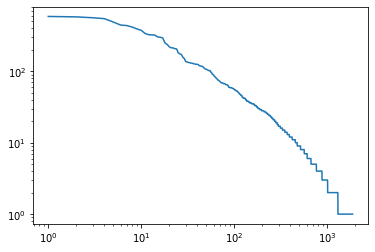

In [106]:
plt.loglog([i+1 for i,_ in enumerate(a)],[f for w,f in a])
plt.show()

In [108]:
bigram = list(nltk.bigrams(tot))
freqdist = nltk.FreqDist(bigram)

In [110]:
freqdist.most_common(50)

[(('comput', 'devic'), 130),
 (('may', 'includ'), 130),
 (('method', 'system'), 124),
 (('least', 'one'), 99),
 (('also', 'disclos'), 97),
 (('variou', 'method'), 94),
 (('system', 'media'), 94),
 (('media', 'also'), 91),
 (('system', 'method'), 79),
 (('mobil', 'devic'), 74),
 (('A', 'method'), 73),
 (('comput', 'system'), 65),
 (('method', 'includ'), 57),
 (('disclos', 'method'), 57),
 (('network', 'traffic'), 56),
 (('the', 'method'), 53),
 (('the', 'disclos'), 51),
 (('includ', 'identifi'), 50),
 (('electron', 'devic'), 50),
 (('disclos', 'A'), 50),
 (('the', 'system'), 49),
 (('disclos', 'the'), 48),
 (('method', 'detect'), 45),
 (('risk', 'score'), 40),
 (('secur', 'threat'), 39),
 (('network', 'devic'), 39),
 (('devic', 'behavior'), 38),
 (('determin', 'whether'), 38),
 (('secur', 'polici'), 38),
 (('comput', 'network'), 37),
 (('data', 'loss'), 35),
 (('machin', 'learn'), 34),
 (('respons', 'determin'), 33),
 (('network', 'secur'), 32),
 (('base', 'least'), 31),
 (('perform', '